<a href="https://colab.research.google.com/github/EbimoJohnny/ALX-Project_3-Prosper-Loan-Data-Analysis/blob/main/08_30_10742_pset1_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMU 10-742 (Fall 2024) - Machine Learning in Healthcare

## Assignment 1: Healthcare Data, Codes, APIs...and Bayesian Inference

Out: Thur Aug 29 2024

Due: Thurs Sep 12 2024

_This assignment counts for 8 points out of the 35 total points allocated to the course problem sets._

In this assignment, we’re going to get familiar with a few popular healthcare datasets, codesets, and APIs. We'll do some [EDA](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm) (exploratory data analysis) on a few popular datasets. We'll investigate the discrepancy between how much  male and female providers make. And we'll get our feet wet with Bayesian inference for clinical diagnosis.  

Notes for this and subsequent assignments:

* Make a copy of this colab notebook and provide your code/answers in the marked sections. To hand in your assignment, download the `.ipynb` file and submit it via the course Canvas site.

* You must only hand it one file - do not decompose your questions into multiple notebooks.

* We assume you have all necessary libraries already installed in your colab environment. If you get a runtime error from colab about an unrecognized import, just install it, e.g. `!pip install numpy.`

* Refer to the [course syllabus](https://adamleeberger.github.io/10742/) for detailed policies on collaboration, using external tools, late policy, etc. Your assignment will be considered on time if the last revision to the notebook is before the assignment deadline.

* The datasets live on various GCP buckets. We've configured these buckets to allow read access from all CMU accounts. Of course, you must be authenticated to your CMU account. We have included (in a cell below) the required code to authenticate this notebook to your CMU account.  

* Show your work. In some cases, this means clear, documented source code. In other cases, it means showing how you arrived at a numeric answer.

* To receive full credit for a problem, your solution must be correct and intuitive and succinct.  Reproducability is critical in ML research, and we expect your code to be clean and well documented.  

* Do not store your answers anywhere that others can easily access them. Your answers should not be accessible from the public internet, or any file system or cloud repository where other students (today or in the future) may be able to access them.

In [ ]:
# Some preliminaries
import locale
import pandas as pd

locale.setlocale(locale.LC_ALL, '')
from google.colab import auth
auth.authenticate_user()

#PART 1: Handling healthcare data (1 point)

In this section, we will validate and  reinforce your understanding of [Physionet's data use agreement](https://physionet.org/content/mimiciii/view-license/1.4/), which covers MIMIC and other datasets.

#1.1

Gabriela and Eli are working on their class project, which involves MIMIC data. They want to use a shared folder on CMU’s Andrew Cluster. By default, files in this folder are readable by other CMU account holders. Would this violate any policies from MIMIC? If so, what precautions, if any, could Gabriela and Eli take to fix these violations? Answer in 1-2 sentences.

**YOUR ANSWER HERE**

This would be violating the second and third policy outlined in the data use agreement, which of which Gabriela and Eli have already agreeed to. Some of the precautions that have to be taken include ensuring that the restrict the data access to only themselve who have the approval to handle the data, that is the both of them.

#1.2

Eric is lazy. He doesn’t want to do the homework, so he copy-pastes notes from MIMIC into ChatGPT to answer a homework question. Would this violate any policies from MIMIC? If so, what precautions, if any, could he take to fix these violations? Answer in 1-2 sentences. (Hint: you may wish to review [this](https://physionet.org/news/post/gpt-responsible-use))

**YOUR ANSWER HERE**

This will be vioating the data use agreement, because ChatGPT is considered as a third party as it does not have data sharing protection for senstive data. If Eric must use any generative AI tool(such as amazon Bedrock, Google Gemini via Vertex AI or Azure OpenAI service), he must use the ones that have data sharing opt-out options so that the data does is not included in the training data for that model.

#PART 2: Playing with FHIR (2 points)

FHIR is a government-supported healthcare API that is becoming an industry standard for exchanging healthcare data.  This set of questions will familiarize you with FHIR.  For this set of questions, we rely on a publicly available FHIR server, called HAPI FHIR. This server contains a collection of synthetic patient data.

Before jumping into these questions, we recommend skimming the following:

<https://fhir-drills.github.io/index.html>: a helpful intro to the FHIR API.  

<https://www.hl7.org/fhir/references.html>: the authoritative online reference.

<https://build.fhir.org/resourcelist.html>: list of resources; refer back to this as you go through these questions.


We have set up a custom FHIR server on Google Cloud that you have access to, ***provided you are signed into your CMU Andrew account***. The following code blocks set up the necessary project and authentication configurations such that you will be able to easily access this server, which contains the patient data that you will need to complete this question.

In [ ]:
!gcloud config set project fhir-10742
import subprocess
token = subprocess.check_output(["gcloud", "auth", "print-access-token"]).strip().decode('utf-8')

headers = {
    "Authorization": f"Bearer {token}",
}

base_url = "http://hapi.fhir.org/baseR4"

Are you sure you wish to set property [core/project] to fhir-10742?

Do you want to continue (Y/n)?  Y

Updated property [core/project].


In [ ]:
base_url = "http://hapi.fhir.org/baseR4"

In [ ]:
base_url = "https://healthcare.googleapis.com/v1/projects/fhir-10742/locations/us-central1/datasets/fhir-dataset/fhirStores/fhir-10742-store/fhir"

If you would prefer to work with the data directly on the public FHIR server, you may replace the base_url above with "http://hapi.fhir.org/baseR4". However, note that this server has known accessibility issues, particularly with high user traffic volumes, and so you are encouraged to interact with the custom server provided, private to CMU-affiliated students.



#2.1

For patient ID `9312817`, how many medications were prescribed? List all these medications (e.g. `Clopidogrel 75 MG Oral Tablet`), along with the date of prescription.

Based just on this list of medications, can you surmise what is the likely medical condition for this patient?

In [ ]:
patient_id = '9312817'

**YOUR ANSWER HERE**

In [ ]:
import requests

response = requests.get(f"{base_url}/Patient/{patient_id}", headers=headers)

if response.status_code == 200:
    print(response.json())
else:
    print(f"Error: {response.status_code} - {response.text}")


{'address': [{'city': 'Boston', 'country': 'US', 'extension': [{'extension': [{'url': 'latitude', 'valueDecimal': 42.354522053537174}, {'url': 'longitude', 'valueDecimal': -71.00212527489367}], 'url': 'http://hl7.org/fhir/StructureDefinition/geolocation'}], 'line': ['363 Swift Extension'], 'postalCode': '02108', 'state': 'Massachusetts'}], 'birthDate': '1957-05-21', 'communication': [{'language': {'coding': [{'code': 'en-US', 'display': 'English', 'system': 'urn:ietf:bcp:47'}], 'text': 'English'}}], 'extension': [{'extension': [{'url': 'ombCategory', 'valueCoding': {'code': '2135-2', 'display': 'Other', 'system': 'urn:oid:2.16.840.1.113883.6.238'}}, {'url': 'text', 'valueString': 'Other'}], 'url': 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-race'}, {'extension': [{'url': 'ombCategory', 'valueCoding': {'code': '2186-5', 'display': 'Not Hispanic or Latino', 'system': 'urn:oid:2.16.840.1.113883.6.238'}}, {'url': 'text', 'valueString': 'Not Hispanic or Latino'}], 'url': 'http:

In [ ]:
import requests
from tabulate import tabulate

response = requests.get(f"{base_url}/MedicationRequest?patient={patient_id}", headers=headers)

drugs = []

if response.status_code == 200:
    medications = response.json().get('entry', [])

    for entry in medications:
        resource = entry.get('resource', {})

        medication_request_intent = resource.get('intent')
        medication_name = resource.get('medicationCodeableConcept', {}).get('text')
        prescription_date = resource.get('authoredOn')
        supporting_info = resource.get('supportingInformation', [])
        reason_code = resource.get('reasonCode', [{}])[0].get('text', 'NaN')

        if supporting_info:
            print("Supporting Information References:")
            for info in supporting_info:
                print(f" - Reference: {info.get('reference')}")

        # Append the medication and its details to the 'drugs' list
        drugs.append([medication_name, prescription_date, medication_request_intent, reason_code])
else:
    print(f"Failed to retrieve medications: {response.status_code} - {response.text}")

table = tabulate(drugs, headers=['Drug', 'Date', 'Intent', 'Reason'], tablefmt='grid')



**I can surmise that this patient had high blood cholerole this is based on historic prescriptions.**



#2.2

For this same patient, how many observations were made? List all these observations.

**YOUR ANSWER HERE**

In [ ]:
med_count = {}

for med in drugs:
    medication_list = [m.strip() for m in med[0].split('/')]# if '/' is in a medication then we seperate so we have the drugs seperated.

    for medication_name in medication_list:
        if medication_name in med_count:
            med_count[medication_name] += 1
        else:
            med_count[medication_name] = 1

print(table)



+-------------------------------------------------------------------------------------------------------------------+---------------------------+----------+----------+
| Drug                                                                                                              | Date                      | Intent   |   Reason |
+===================================================================================================================+===========================+==========+==========+
| Simvistatin 10 MG                                                                                                 | 2005-06-20T04:26:51-04:00 | order    |      nan |
+-------------------------------------------------------------------------------------------------------------------+---------------------------+----------+----------+
| Simvistatin 10 MG                                                                                                 | 2010-06-19T04:26:51-04:00 | order    |    

**There are about 20 observation of that patient visit to the hospital and getting medications**

In [ ]:
# Obervations for each of the drug
for medication_name, count in med_count.items():
    print(f'Drug: {medication_name} observed {count} times')


Drug: Simvistatin 10 MG observed 16 times
Drug: diphenhydrAMINE Hydrochloride 25 MG Oral Tablet observed 1 times
Drug: Hydrochlorothiazide 25 MG observed 1 times
Drug: Amoxicillin 250 MG observed 1 times
Drug: Clavulanate 125 MG Oral Tablet observed 1 times
Drug: Acetaminophen 21.7 MG observed 1 times
Drug: ML observed 2 times
Drug: Dextromethorphan Hydrobromide 1 MG observed 1 times
Drug: doxylamine succinate 0.417 MG observed 1 times
Drug: ML Oral Solution observed 1 times


#2.3

Plot the glucose values over time for this patient. Note that the LOINC code for glucose is `2339-0`, so your FHIR query should look something like:

 `query_url = {base_url}/Observation?code=2339-0&patient={patient_id}`

 Two consecutive readings above 125 mg/DL is suggestive of diabetes. Does this patient appear to be diabetic, based only on the reported glucose levels?

**YOUR ANSWER HERE**

In [ ]:
# query_url = {base_url}/Observation?code=2339-0&patient={patient_id}

response = requests.get(f"{base_url}/Observation?code=2339-0&patient={patient_id}", headers=headers)
# print(response.json())
glucose = response.json()


In [ ]:
import pandas as pd

observations = [
    {
        "Observation ID": entry['resource']['id'],
        "Effective Date": entry['resource']['effectiveDateTime'],
        "Glucose Value": entry['resource']['valueQuantity']['value'],
        "Unit": entry['resource']['valueQuantity']['unit'],
        "Patient Reference": entry['resource']['subject']['reference']
    }
    for entry in glucose['entry']
]

df = pd.DataFrame(observations)


In [ ]:
print(df.tail())

   Observation ID             Effective Date  Glucose Value   Unit  \
15        9312948  2010-06-19T04:26:51-04:00      82.688899  mg/dL   
16        9312980  2011-06-14T04:26:51-04:00      70.107974  mg/dL   
17        9312995  2011-06-19T04:26:51-04:00      72.304092  mg/dL   
18        9313036  2012-06-18T04:26:51-04:00      81.605356  mg/dL   
19        9312928  2010-06-08T04:26:51-04:00      79.410301  mg/dL   

   Patient Reference  
15   Patient/9312817  
16   Patient/9312817  
17   Patient/9312817  
18   Patient/9312817  
19   Patient/9312817  


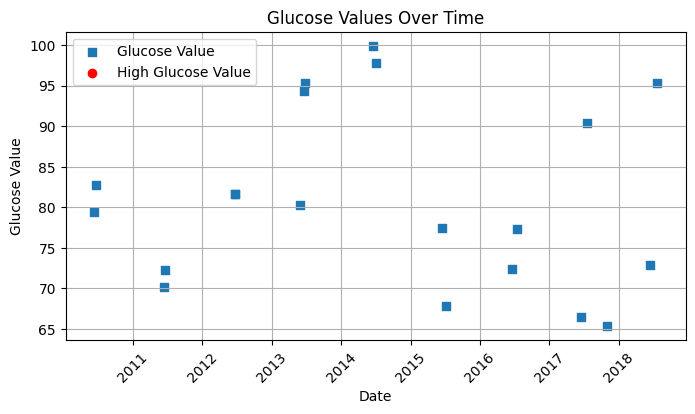

In [ ]:
import matplotlib.pyplot as plt
df['Effective Date'] = pd.to_datetime(df['Effective Date'])

plt.figure(figsize=(8, 4))
plt.scatter(df['Effective Date'], df['Glucose Value'], marker='s', label='Glucose Value')

high_glucose = df[df['Glucose Value'] > 125]
plt.scatter(high_glucose['Effective Date'], high_glucose['Glucose Value'], marker='o', color='r', label='High Glucose Value')

plt.ylabel('Glucose Value')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Glucose Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

**No he doesn't have, based on his glucose values we have on the data**

#PART 3: CMS Data (3 points)

The Centers for Medicare & Medicaid Services (CMS) is the U.S. federal agency that  administers the Medicare program, which provides health insurance to Americans aged 65 and older. Besides overseeing Medicare, CMS also jointly administers Medicaid with state governments, providing health insurance to low-income individuals and families, and also manages few other programs (e.g. CHIP, ACA).   

CMS began publishing open datasets in 2010 as part of President Obama's Open Government Initiative. It’s remarkable what kind of data you can download, for free and without credentials, from https://data.cms.gov. Have a look!

This set of questions will familiarize you with the kind of data that payers (CMS and private insurers like Cigna) collect and manage. This is often called “administrative” data, to contrast it with the kind of data (mostly clinical) that hospitals and doctor offices collect and manage.

We’ve downloaded the Medicare Physician & Other Practitioners - by Provider database from CMS for you, and taken a random sampling of 10% of the data, to make it more manageable.

In [ ]:
path="Medicare_Physician_Other_Practitioners_by_Provider_2021_processed.csv"
!gsutil cp gs://10-742/assignment_1/{path} ./
df = pd.read_csv(path, low_memory=False)

# This file was processed from the original CMS file, available at
# https://data.cms.gov/provider-summary-by-type-of-service/medicare-physician-other-practitioners/medicare-physician-other-practitioners-by-provider
#
# In case you're curious, here's how we processed this file for you:
#
# prune out 90% of the rows away (to make it a more manageable size)
# prune out rows which correspond to a *facility*, not an individual provider.
# remove low-frequency provider types and states
# remove columns with more than 20% missing data
# replace remaining missing cells with 0 (for numerical columns) or 'nothing' (for categorical columns)

Copying gs://10-742/assignment_1/Medicare_Physician_Other_Practitioners_by_Provider_2021_processed.csv...
/ [1 files][ 36.1 MiB/ 36.1 MiB]                                                
Operation completed over 1 objects/36.1 MiB.                                     


In [ ]:
# EDA
if True:
  print("Here are all the provider types in the data:\n")
  type_counts = df["Rndrng_Prvdr_Type"].value_counts()
  print(type_counts)
  print("\nHere are all the states in the data:\n")
  type_counts = df["Rndrng_Prvdr_State_Abrvtn"].value_counts()
  print(type_counts)

Here are all the provider types in the data:

Rndrng_Prvdr_Type
Nurse Practitioner                        13042
Internal Medicine                          8157
Physician Assistant                        7227
Family Practice                            6712
Physical Therapist in Private Practice     6443
                                          ...  
Colorectal Surgery (Proctology)             150
Geriatric Medicine                          150
Interventional Pain Management              140
Cardiac Surgery                             122
Oral Surgery (Dentist only)                 100
Name: count, Length: 62, dtype: int64

Here are all the states in the data:

Rndrng_Prvdr_State_Abrvtn
CA    7712
NY    7015
TX    6480
FL    6089
PA    5074
OH    4118
IL    3911
MI    3486
NC    3358
MA    3197
NJ    3025
GA    2820
VA    2453
TN    2297
MN    2188
WA    2158
MD    2112
WI    2093
IN    2062
MO    1987
AZ    1971
CO    1704
SC    1550
KY    1507
CT    1404
AL    1398
LA    1353
OR    12

# 3.1

Plot a histogram of the values for `Tot_Mdcr_Pymt_Amt`, which is the total amount during 2021 that each provider was paid by CMS for treating Medicare members. Why might it be preferable to use a logarithmic scale on the y-axis?

**YOUR ANSWER HERE**

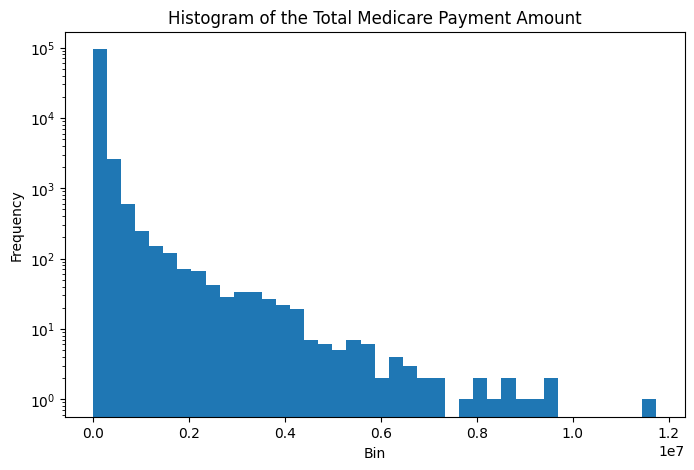

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['Tot_Mdcr_Pymt_Amt'], bins=40)
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.title('Histogram of the Total Medicare Payment Amount')
plt.yscale('log')
plt.show()

***We had to use the log scale for the Frequency of the payment. Hence we need to use a logarithmic scale which tries to raise each points to a power, making it easier to view both low and high frequency, thereby making it easy to be seen and interpreted.***

#3.2

What are the top ten specialties (i.e. `Rndrng_Prvdr_Type`), ranked by decreasing average per-provider total Medicare payment? The bottom ten specialties?

In [ ]:
specialty_avg_payment = df.groupby('Rndrng_Prvdr_Type').apply(lambda x: x['Tot_Mdcr_Pymt_Amt'].mean()).reset_index(name='Mean_payment')
sorted_specialties = specialty_avg_payment.sort_values(by='Mean_payment', ascending=False)

top_10 = sorted_specialties.head(10)

bottom_10 = sorted_specialties.tail(10)

print("The Top 10 Specialties by Average Medicare Payment:")
print(top_10)

print("\nThe Bottom 10 Specialties by Average Medicare Payment:")
print(bottom_10)


The Top 10 Specialties by Average Medicare Payment:
                     Rndrng_Prvdr_Type   Mean_payment
22                 Hematology-Oncology  751134.820986
31                    Medical Oncology  617695.529030
56                        Rheumatology  564101.025904
38                       Ophthalmology  451653.053529
12                         Dermatology  270404.385547
61                    Vascular Surgery  267642.956934
54                  Radiation Oncology  254677.260610
29            Interventional Radiology  248026.243706
28      Interventional Pain Management  246263.081786
9   Clinical Cardiac Electrophysiology  235014.078982

The Bottom 10 Specialties by Average Medicare Payment:
                                 Rndrng_Prvdr_Type  Mean_payment
57                     Speech Language Pathologist  27978.967050
6              Certified Clinical Nurse Specialist  27925.830321
48                             Physician Assistant  27907.035955
30                 Licensed Clinical S

In [ ]:
specialty_avg_payment

,Rndrng_Prvdr_Type,Mean_payment
0,Allergy/ Immunology,175640.214203
1,Anesthesiology,39792.294266
2,Anesthesiology Assistant,11776.627739
3,Audiologist,7114.618403
4,Cardiac Surgery,150907.354016
...,...,...
57,Speech Language Pathologist,27978.967050
58,Sports Medicine,110531.183377
59,Thoracic Surgery,99307.701713
60,Urology,203075.073842


**YOUR ANSWER HERE**

#3.3

Show a bar graph of total payment by state, with the states shown in decreasing order of average payment. Note that the `Rndrng_Prvdr_State_Abrvtn` column stores the state for the provider.  

**YOUR ANSWER HERE**

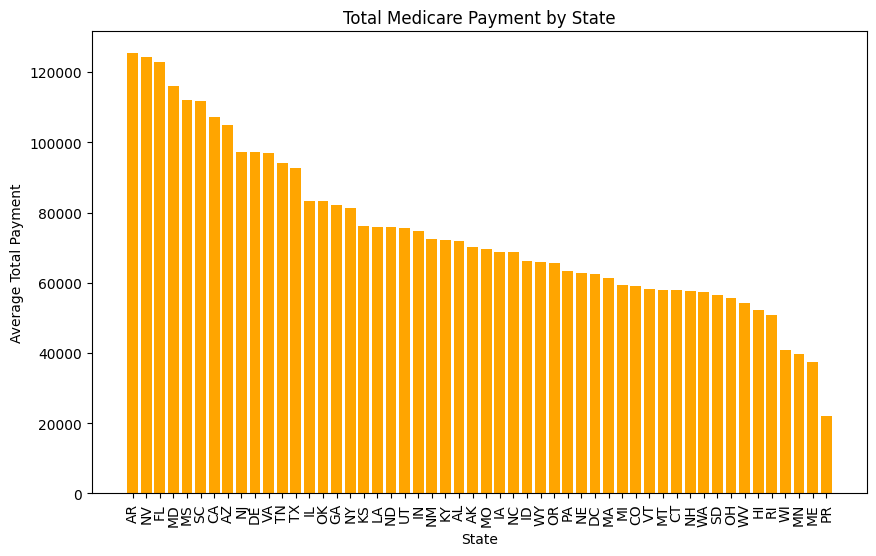

In [ ]:
import matplotlib.pyplot as plt

specialty_avg_payment = df.groupby('Rndrng_Prvdr_State_Abrvtn').apply(lambda x: x['Tot_Mdcr_Pymt_Amt'].mean()).reset_index(name='Mean_payment')

sorted_state = specialty_avg_payment.sort_values(by='Mean_payment', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_state['Rndrng_Prvdr_State_Abrvtn'], sorted_state['Mean_payment'], color='orange')
plt.xlabel('State')
plt.ylabel('Average Total Payment')
plt.title('Total Medicare Payment by State')
plt.xticks(rotation=90)
plt.show()


# 3.4

So far we've observed that Medicare payments to providers vary widely by specialty, and they also vary significantly by geography. Let's now look at the gender of the provider. Produce a bar graph of the average total Medicare payment, by gender.

**YOUR ANSWER HERE**

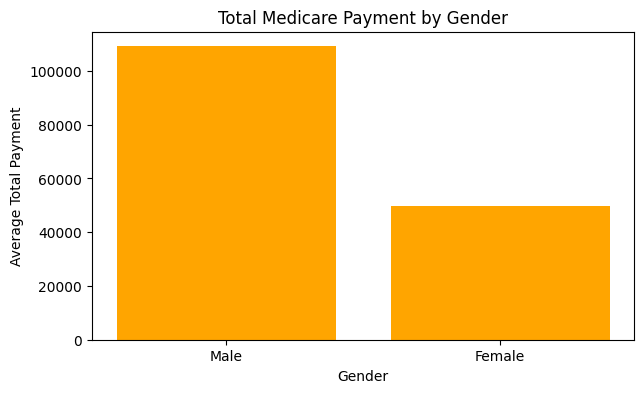

In [ ]:
avg_payment = df.groupby('Rndrng_Prvdr_Gndr').apply(lambda x: x['Tot_Mdcr_Pymt_Amt'].mean()).reset_index(name='Mean_payment')
sorted_gender = avg_payment.sort_values(by='Mean_payment', ascending=False)

gender_labels = sorted_gender['Rndrng_Prvdr_Gndr'].map({'M': 'Male', 'F': 'Female'})#changing M to male and F to Female

plt.figure(figsize=(7, 4))
plt.bar(gender_labels, sorted_gender['Mean_payment'], color='orange')
plt.xlabel('Gender')
plt.ylabel('Average Total Payment')
plt.title('Total Medicare Payment by Gender')
plt.show()


# 3.5

It sure looks like CMS pays male providers a lot more than female providers! That is concerning. But before we jump to conclusions, let's take a closer look at our data.

Where might there be [confounding variables](https://www.qualitymatters.org/qa-resources/resource-center/articles-resources/confounding-variables-in-research)?

For example, nurses get paid less than doctors, and perhaps there are more female nurses, thus skewing the overall payment distribution? Could it be that the genders are not equally represented in certain (high or low paying) specialties?

To start our investigation, let's measure the association between gender and provider type. More specifically, we'll use the [chi-squared test](https://www.khanacademy.org/math/statistics-probability/inference-categorical-data-chi-square-tests) to determine if there's a statistically significant association between `Rndrng_Prvdr_Gndr` and `Rndrng_Prvdr_Type`. If the p-value for the test is below 0.05, it indicates that the association observed in the data is unlikely to be due to chance.

Report the p-value of the chi-squared test. Is there a statistically significant association between gender and provider type?

**YOUR ANSWER HERE**

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Rndrng_Prvdr_Gndr'], df['Rndrng_Prvdr_Type'])
stat, p, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
print("p-value is:", p)

if p < alpha:
    print('The Association between gender and provider type is not likely due to chance.')
    print('Hence there is statistical significance')
else:
    print('The Association betwen gender and provider type is likely due to chance.')
    print('Hence there is no statistical significance')


##https://www.stratascratch.com/blog/chi-square-test-in-python-a-technical-guide/

p-value is: 0.0
The Association between gender and provider type is not likely due to chance.
Hence there is statistical significance


In [ ]:
contingency_table

Rndrng_Prvdr_Type,Allergy/ Immunology,Anesthesiology,Anesthesiology Assistant,Audiologist,Cardiac Surgery,Cardiology,Certified Clinical Nurse Specialist,Certified Registered Nurse Anesthetist (CRNA),Chiropractic,Clinical Cardiac Electrophysiology,...,"Psychologist, Clinical",Pulmonary Disease,Radiation Oncology,Registered Dietitian or Nutrition Professional,Rheumatology,Speech Language Pathologist,Sports Medicine,Thoracic Surgery,Urology,Vascular Surgery
Rndrng_Prvdr_Gndr,,,,,,,,,,,,,,,,,,,,,
F,73,1043,152,586,7,284,141,2917,797,15,...,782,168,104,209,232,192,23,20,69,57
M,134,2890,131,84,115,1405,15,1951,2614,211,...,561,611,322,6,227,8,128,231,665,305


#3.6

Now let's try to remove one suspected confounding variable, which is the licensure level.  Do this by only looking at rows where `Rndrng_Prvdr_Crdntls` is "MD" or "M.D." For these remaining rows, plot the average total payment by gender.

Does this even out the results?

**YOUR ANSWER HERE**

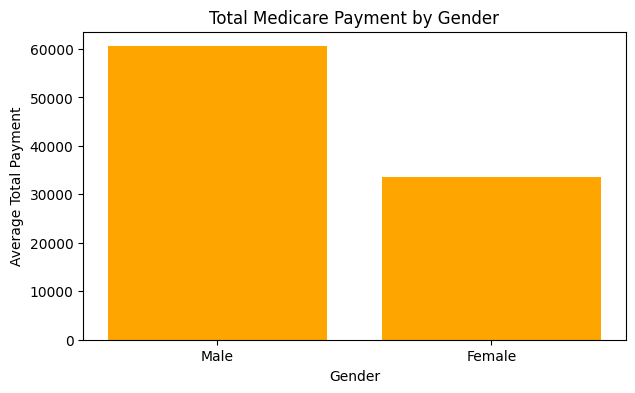

In [ ]:
no_MD = (df['Rndrng_Prvdr_Crdntls'] != 'MD') & (df['Rndrng_Prvdr_Crdntls'] != 'M.D.')

filtered_df = df[no_MD]

# print(f'The count of observation is {filtered_df.count()}')
avg_payment = filtered_df.groupby('Rndrng_Prvdr_Gndr').apply(lambda x: x['Tot_Mdcr_Pymt_Amt'].mean()).reset_index(name='Mean_payment')
sorted_gender = avg_payment.sort_values(by='Mean_payment', ascending=False)

gender_labels = sorted_gender['Rndrng_Prvdr_Gndr'].map({'M': 'Male', 'F': 'Female'})#changing M to male and F to Female

plt.figure(figsize=(7, 4))
plt.bar(gender_labels, sorted_gender['Mean_payment'], color='orange')
plt.xlabel('Gender')
plt.ylabel('Average Total Payment')
plt.title('Total Medicare Payment by Gender')
plt.show()


# 3.7

Let's now remove the confounding variable of provider type.  One way to accomplish this is using [matched-pair analysis](https://statisticsbyjim.com/basics/matched-pairs-design/).

The idea is this. We will subsample the rows of our dataset so that, for each provider type, we have the same number of samples from each gender. With this new dataset, we can re-investigate the association between gender and payment, but this time, we will have removed the confounding factor of provider type.

More specifically, your task here is to:
- Consider only rows where `Rndrng_Prvdr_Crdntls` is "MD" or "M.D."
- Prune all rows where `Rndrng_Prvdr_Type` occurs less than 100 times in the dataset.
- For each remaining `Rndrng_Prvdr_Type`, select an equal number of each gender.
- Create a new bar graph, as above, showing `Tot_Mdcr_Pymt_Amt` against Rndrng_Prvdr_Gndr


What are your observations? Is there still a discrepancy? If yes, what might be the reason for that?


**YOUR ANSWER HERE**

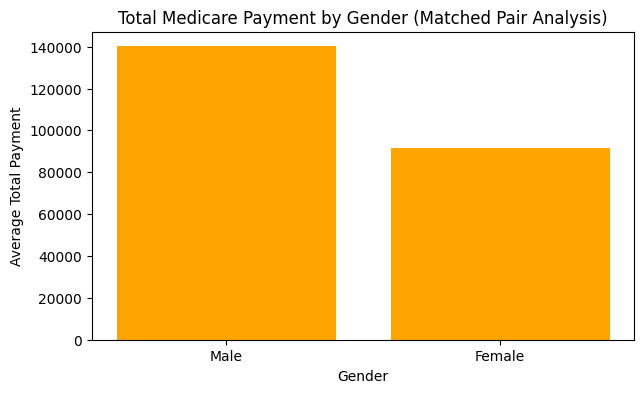

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

md_row = df[(df['Rndrng_Prvdr_Crdntls'] == 'MD') | (df['Rndrng_Prvdr_Crdntls'] == 'M.D.')]

provider_counts = md_row['Rndrng_Prvdr_Type'].value_counts()
pruned_md_row = md_row[md_row['Rndrng_Prvdr_Type'].isin(provider_counts[provider_counts > 100].index)]

matched_df = pruned_md_row.groupby('Rndrng_Prvdr_Type').apply(
    lambda x: x.groupby('Rndrng_Prvdr_Gndr').apply(lambda y: y.sample(n=min(len(y), len(x[x['Rndrng_Prvdr_Gndr'] != y['Rndrng_Prvdr_Gndr'].iloc[0]]))))
).reset_index(drop=True)

avg_payment = matched_df.groupby('Rndrng_Prvdr_Gndr')['Tot_Mdcr_Pymt_Amt'].mean().reset_index(name='Mean_payment')
sorted_gender = avg_payment.sort_values(by='Mean_payment', ascending=False)

gender_labels = sorted_gender['Rndrng_Prvdr_Gndr'].map({'M': 'Male', 'F': 'Female'})  # Change M to Male and F to Female

plt.figure(figsize=(7, 4))
plt.bar(gender_labels, sorted_gender['Mean_payment'], color='orange')
plt.xlabel('Gender')
plt.ylabel('Average Total Payment')
plt.title('Total Medicare Payment by Gender (Matched Pair Analysis)')
plt.show()




#Part 4: Bayesian Inference (2 points)

Congratulations! You have just been appointed Chief of Springfield General Hospital's DRG - the Diagnostic Referral Group. This is the elite team of expert clinicians who consult on the trickiest cases in the hospital.

As an expert diagnostician, you rely on Bayesian inference as a core part of your toolkit.

You have been called in to help assess whether a patient, Harry Q Bovik, has the rare disease called "Yinzer syndrome."

Yinzer syndrome affects about 1 in 10,000 people. A new test has been developed to detect this disorder, which has the following characteristics:

* Sensitivity (True Positive Rate): 99%
* Specificity (True Negative Rate): 98%

Mr. Bovik has tested positive for Yinzer syndrome. Your job is to determine whether Mr. Bovik actually has Yinzer syndrome.


#4.1

Explain succinctly what is meant by sensitivity and specificity in this context. How do these terms relate to the terms recall and precision?

Let's define some terms:

𝑃(𝐷) : probability of the disease (Yinzer syndrome, in this case)

𝑃(𝑇) : probability of a positive test

𝑝(𝐷|𝑇)  and  𝑝(𝑇|𝐷)  should hopefully be obvious

**YOUR ANSWER HERE**

Senstivity in this context is the percentage of persons who have the disease and are correctly identified as having Yinzer syndrome. The mathematical formular is the percentage ratio of True postive to the sum of true postive and false negative. That is;

Sensitivity = TP / (TP + FN)


While specificity is percentage of persons without the disease(Yinzer disease) and are correctly labeled as not having the disease. The mathematical formular is the percentage of True Negative to the sum of true negative and false postive. That is ;

Specificity = TN / (TN + FP)

In the context of recall and precison, recall and sentivity are the same but often times, sentivity is used when refering to medical data while recall is used for non-medicial data. while specificity and precision is not excactly the same as  Precision is the percentage of true positive results among all positive results, that is measuring the accuracy of postive predictions while specificity measure correctness of identifying negative predictions.

Precision = TP / (TP + FP)

And usually specificity is used when refering to medical data while precison is used when refering to other types of data





#4.2

Given this terminology and using Bayes Theorem, calculate the posterior probability $p(D|T)$ as a function of known numeric quantities. Show your work.

**YOUR ANSWER HERE**

Given that,
probability of getting yinzer syndrome is 1/10000 = 0.0001
probability of testing postive given that I have the diease which is the sensitivity = 0.99
probability of testing postive = prob(testing postive| I have the diease) * prob(having the disease) + prob(testing postive | I do not have the disease) * prob( not having the disease)

where:
prob(testing postive| I have the diease) = 0.99


prob(having the disease) = 0.0001


prob(testing postive | I do not have the disease) = 1- prob(testing negative| you do not have the disease)= 1- (specificity) = 0.02


prob( not having the disease) = 1-0.0001 = 0.9999

P(T) = P(T|D)*P(D) + P(T|D')*P(D')


P(T) = 0.99 * 0.0001 + 0.02* 0.9999 = 0.020097


Hence the Posterior prob,

P(D|T) = (P(T|D)* P(D))/P(T)

P(D|T) = (0.99* 0.0001)/ 0.020097

P(D|T) = 0.0049


Hence the posterior probability is **0.49%**

#4.3

It is interesting to observe that $p(T|D)$ is so large and $p(D|T)$ is so small. Provide an intuitive explanation for that. Give some real-world examples of diseases $D$ and symptoms $T$ where this same discrepancy between $p(T|D)$ and $p(D|T)$ holds.

**YOUR ANSWER HERE**

This is becuase in most cases there is no one symptoms that justifies that a person has the disease. Hence p(T|D) which means the probality that a persons has the symptom(T) of **cough** given that the person has the disease(D) **Covid-19** is very high as that is one of the common symptom that shows covid, but the fact that the person has the disease **Covid-19** given that the person is **coughing** is very low as that is not the only cause of the infection, make this one we have to consider all the possibility that are associated with someon coughing which include flu, tuberculosis and others that is only when the p(**D|T**) will begin to increase.

#4.4

Now suppose new genetic research determines that individuals with certain characteristics (e.g., family history, ancestry from a particular region) have a higher base rate of Yinzer syndrome, at 1 in 1,000. Recalculate the posterior probability for these individuals. Show your work.


**YOUR ANSWER HERE**

P(D) = 0.001

P(D') =  0.999

P(T|D) = 0.99

P(T|D') = 1-(98/100) = 0.02


P(T) = P(T|D)*P(D) + P(T|D')* P(D')

P(T) = 0.99 * 0.001 + 0.02* 0.999 = 0.02097

Hence the Posterior prob, P(D|T) = (P(T|D)* P(D))/P(T)

P(D|T) = (0.99* 0.001)/ 0.02097

P(D|T) = 0.04721

P(D|T) = **4.72%**
